In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Social_Network_Ads.csv").iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1), # Features x
    df['Purchased'],              # Target variable y
    test_size=0.3,
    random_state=0
)

(280, 2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # Fit the scaler on the training data

X_train_scaled = scaler.transform(X_train) # Transform the training data
X_test_scaled = scaler.transform(X_test)   # Transform the test data
#i learn from training but apply on both

# Convert the scaled arrays back to DataFrames for easier handling
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled


,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [17]:
#after scaling
np.round(X_train_scaled.describe(),1)  #mean should be 0,standard deviation should be 1

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


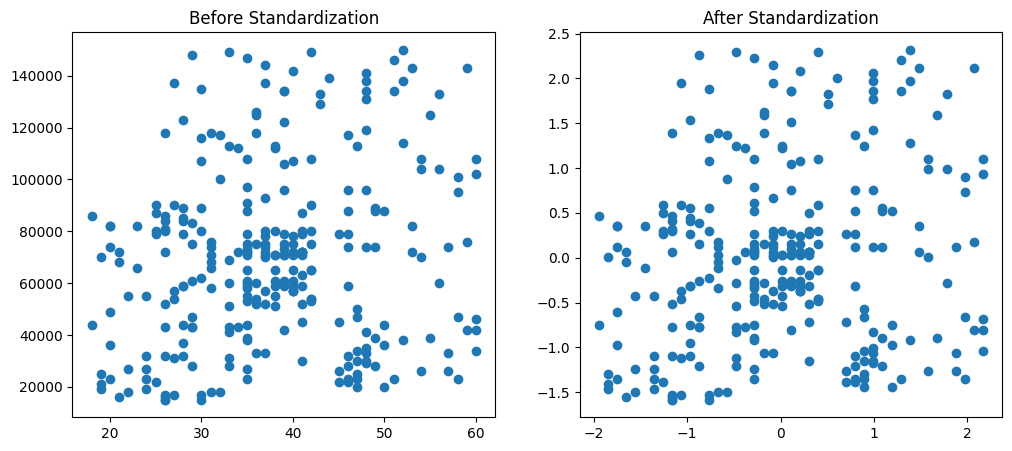

In [18]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Standardization")
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax2.set_title("After Standardization")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
plt.show()

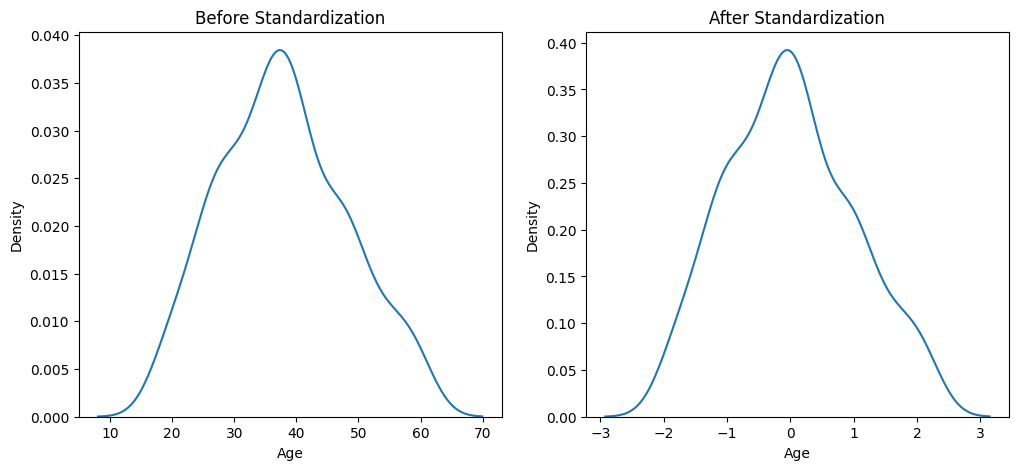

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Age distribution Before Standardization")
sns.kdeplot(data=X_train, x='Age', ax=ax1)
ax2.set_title("Age distribution After Standardization")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

In [23]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy without Standardization:", accuracy_score(y_test, y_pred))
print("Accuracy with Standardization:", accuracy_score(y_test, y_pred_scaled))

Accuracy without Standardization: 0.875
Accuracy with Standardization: 0.8666666666666667
